##NOTEBOOK 1 EDA Y LIMPIEZA ##
En esta sección se realizará la exploración del conjunto de datos y limpieza.

Nos centramos en la exploración y limpieza de datos (EDA) asegurándonos de que el dataset esté listo para entrenar el modelo.

Que contiene:

1) Descripción general de los datos.
2) Exploración visual (distribución de clases, palabras cales, entre otras).
3) Limpieza del texto (remover nulos, eliminar caracteres especiales, etc).
4) Preparación final del modelo.

1) Instalación de librerías

In [1]:
!pip install -q -U "transformers" "datasets" "accelerate" sentencepiece scikit-learn
!pip install kagglehub



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 10.0 MB/s eta 0:00:00


2) Cargamos y exploramos el dataset de Kaggle que elegimos

In [2]:
import kagglehub
import os
import pandas as pd

# Descargar dataset desde Kaggle
path = kagglehub.dataset_download("srinandanv/amazon-product-reviews")
csv_path = os.path.join(path, "cleaned_amazon_reviews.csv")
print(f"CSV path: {csv_path}")

# Cargar el dataset
df = pd.read_csv(csv_path)


100%|██████████| 5.53M/5.53M [00:00<00:00, 71.6MB/s]

Extracting files...


CSV path: /root/.cache/kagglehub/datasets/srinandanv/amazon-product-reviews/versions/1/cleaned_amazon_reviews.csv


3) Realizamos exploración inicial, visualizamos rápidamente al dataset

In [3]:
# Ver las primeras filas
df.head()

# Ver la distribución de las categorías de sentimientos
print(df['sentiment_category'].value_counts())


sentiment_category
Positive    18806
Negative     2144
Neutral       305
Name: count, dtype: int64


4) Limpieza del texto
Los datos deben ser limpiados, eliminando valores nulos y renombrando columnas

In [4]:
# Eliminar filas con valores nulos
df = df[['cleaned_review', 'sentiment_category']].dropna()

# Renombrar la columna de texto
df = df.rename(columns={'cleaned_review': 'reviewText'})


5) Visualización de distribución:

Aqui observamos la distribución de los sentimientos

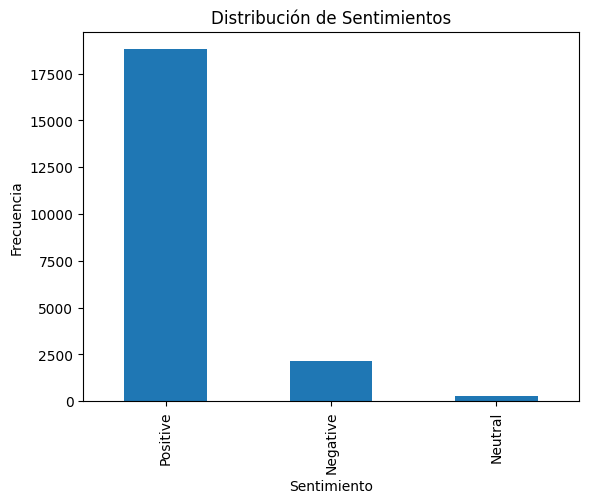

In [5]:
import matplotlib.pyplot as plt

# Distribución de clases
df['sentiment_category'].value_counts().plot(kind='bar')
plt.title('Distribución de Sentimientos')
plt.ylabel('Frecuencia')
plt.xlabel('Sentimiento')
plt.show()


6) Preprocesamiento de texto:
Definimos una función de limpieza que nos permite normalizar los textos

In [6]:
import re

def limpiar_texto(texto):
    texto = str(texto).strip().lower()
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    return texto

# Aplicar la limpieza al texto
df['reviewText'] = df['reviewText'].apply(limpiar_texto)


7) Mapeo de etiquetas:

Aqui convertimos las categorías de sentimientos en valores numéricos.

In [7]:
label_map = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

df['label'] = df['sentiment_category'].map(label_map)


8) División del dataset en train y test:

Como último punto aquí dividimos el dataset en conjuntos de entrenamiento y de prueba.

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['label']
)

print(f"Tamaño del conjunto de entrenamiento: {len(train_df)}")
print(f"Tamaño del conjunto de prueba: {len(test_df)}")


Tamaño del conjunto de entrenamiento: 17004
Tamaño del conjunto de prueba: 4251


9. Para no depender del Notebook 1 creamos este archivo limpio

In [9]:
# Guardar dataset limpio para el entrenamiento
ruta_salida = "/content/amazon_reviews_limpio.csv"

df[['reviewText', 'label']].to_csv(ruta_salida, index=False)

print("Archivo guardado en:", ruta_salida)


Archivo guardado en: /content/amazon_reviews_limpio.csv


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
ruta_salida = "/content/drive/MyDrive/proyecto_ia/amazon_reviews_limpio.csv"

import os
os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)

df[['reviewText', 'label']].to_csv(ruta_salida, index=False)
print("Archivo guardado en:", ruta_salida)


Archivo guardado en: /content/drive/MyDrive/proyecto_ia/amazon_reviews_limpio.csv
